The calculated terminal velocity of the dust particle was 6.42E-01, and therefore the resultant Dv is 6.42E-05.
Therefore, because 6.42E-05 < 7.00E-5, it is fair to assume that linear air resistance is the dominant form and quadratic can be neglected.



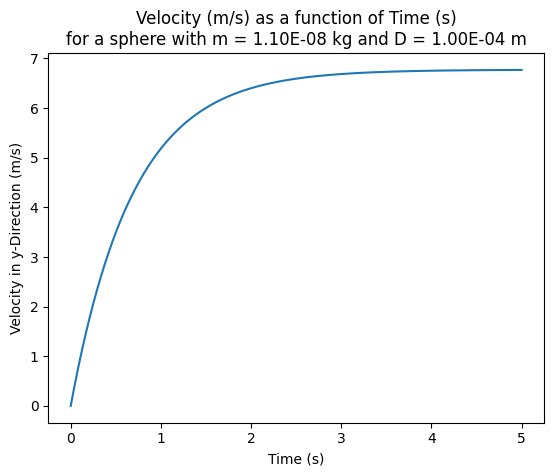

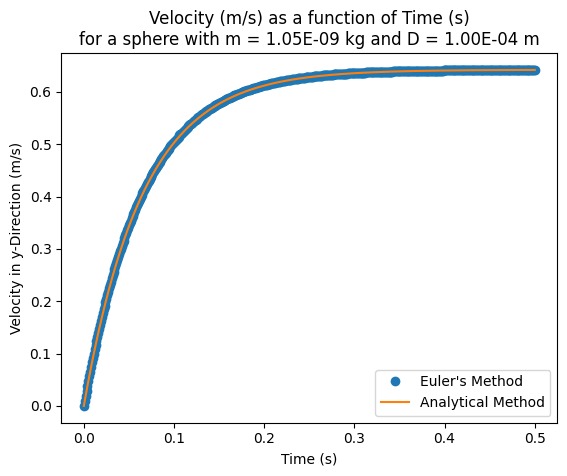

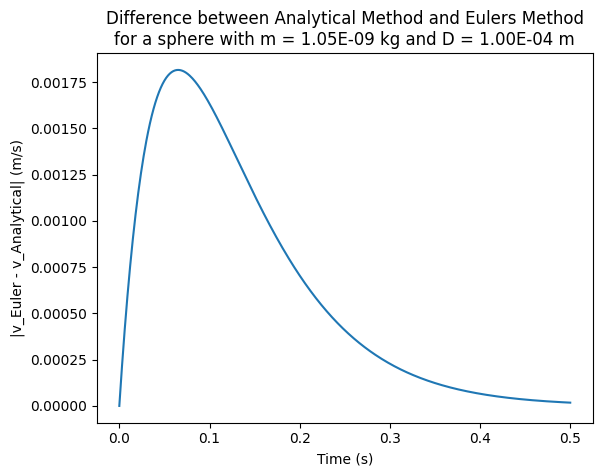

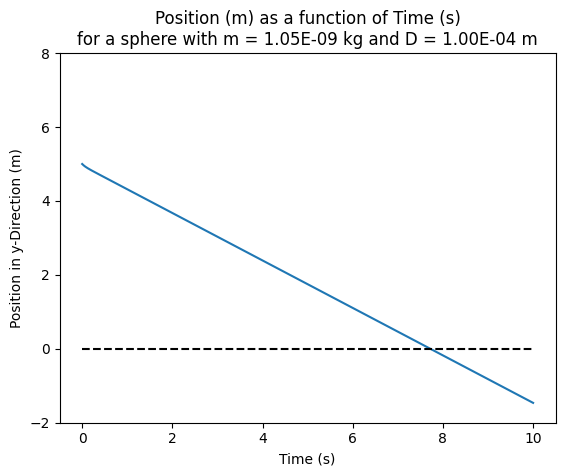



The amount of time it takes for the dust particle to reach the ground is roughly 7.72 seconds.




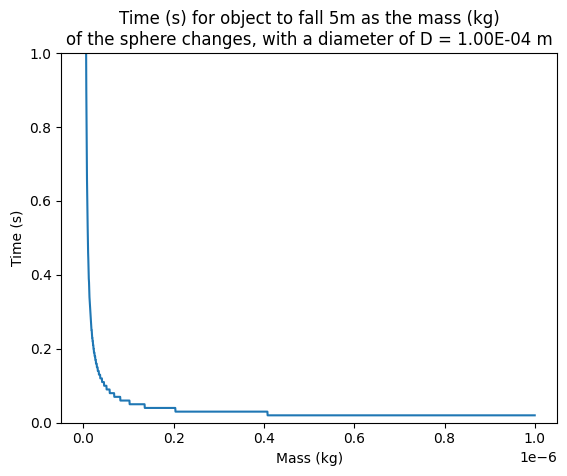

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

#parameters
gravity = 9.81 #m/s^2
B = 1.6e-4 #Ns/m^2
diameter = 1e-4
b = B*diameter
mass_dust = (4/3) * math.pi * (diameter/2.0)**3 * (2000) #volume * mass density = mass

#PART 2A)
V_T = mass_dust*gravity/(B*diameter)
DV_T = V_T * diameter
print("The calculated terminal velocity of the dust particle was %0.2E, and therefore the resultant Dv is %0.2E."%(V_T,DV_T))
print("Therefore, because %0.2E < 7.00E-5, it is fair to assume that linear air resistance is the dominant form and quadratic can be neglected.\n" %(DV_T))

#PART 2B and 2C)
time = 0 #seconds
dt = 0.001 #seconds
#tmax = 0.5 #second - used for figure 4
tmax = 5 #second, used for figures 5
#tmax = 20 #second, used for figure 6
v_y = 0 #m/s
time_list = [time]
velocity_list = [v_y]
#mass = mass_dust #used for figure 4
mass = mass_dust + 1e-8 #used for figure 5
#mass = mass_dust + 1e-7 #used for figure 6

while (time<tmax): #while the time elapsed is less then the max we've set before
    dvy = gravity*dt - (b/mass)*v_y*dt #finds change in speed per dt
    v_y = v_y + dvy #finds speed at time t + dt
    time = time + dt #iterates time
    
    time_list.append(time) #adds values to lists
    velocity_list.append(v_y)

#makes graph
plt.figure()
plt.plot(time_list,velocity_list)                  
plt.title('Velocity (m/s) as a function of Time (s)\nfor a sphere with m = %0.2E kg and D = %0.2E m'%(mass,diameter) )
plt.xlabel('Time (s)')
plt.ylabel('Velocity in y-Direction (m/s)')
plt.show()

#PART 2D)
time = 0 #seconds
dt = 0.001 #seconds
tmax = 0.5 #second
v_y = 0 #m/s
time_list = [time]
velocity_list = [v_y]
analytical_list = [v_y]

while (time<tmax): #while the time elapsed is less then the max we've set before
    dvy = gravity*dt - (b/mass_dust)*v_y*dt #finding change in speed in dt
    v_y = v_y + dvy #finds speed at time t + dt
    time = time + dt #iterates time
    analytic = (mass_dust*gravity/b)*(1.0-math.e**(-b*time/mass_dust)) #finds speed at specific time using analytic formula
    
    time_list.append(time) #adds values to lists
    velocity_list.append(v_y)
    analytical_list.append(analytic)

#makes graph
plt.figure()
plt.plot(time_list,velocity_list,'o')
plt.plot(time_list,analytical_list)                    
plt.title('Velocity (m/s) as a function of Time (s)\nfor a sphere with m = %0.2E kg and D = %0.2E m'%(mass_dust,diameter) )
plt.legend(["Euler's Method",'Analytical Method'], loc = 'lower right')
plt.xlabel('Time (s)')
plt.ylabel('Velocity in y-Direction (m/s)')
plt.show()

i = 0
diff_list = []
while(i<len(velocity_list)): #iterates through every element of the velocity list
    diff_list.append(abs(velocity_list[i] - analytical_list[i])) #makes list of v_euler - v_analytical
    i = i + 1

#makes graph
plt.figure()
plt.plot(time_list,diff_list)                
plt.title('Difference between Analytical Method and Eulers Method\nfor a sphere with m = %0.2E kg and D = %0.2E m'%(mass_dust,diameter) )
plt.xlabel('Time (s)')
plt.ylabel('|v_Euler - v_Analytical| (m/s)')
plt.show()



#PART 2E)
def terminal_analytical_method(mass,diameter,time): #function to reduce code writing, it calculates terminal velocity
    result = (mass*gravity/(b))*(1-math.e**( (-b*time)/mass) )
    return result

#Setting Parameters for determining how long it takes for the Dust Particle to fall 5 meters
height,position = 5,5 #meters
time = 0 #seconds
position_list = []
time_list = []
truth = 0
Terminal = terminal_analytical_method(mass_dust,diameter,250) #finding the terminal velocity, using a large time value
tau = Terminal/gravity

#y(t) = V_terminal*time + (V_y_intial-V_terminal)*(Terminal/Gravity)*( 1-e^(-time/[Terminal/Gravity]) )
#y(t) = V_T*t + (-V_T)*(tau)*(1-e^[-t/tau])
#this is the integral of the analytical solution. V_y_initial = 0. tau is shorthand for Terminal/Gravity.
#This derivation is from Classical Mechanics Textbook. Reference is [3] in lab report.

while(time<10): #keep looping while time < 10 seconds
    position = height - (Terminal * time) + (-1*Terminal)*(tau)*(1-math.e**(-1*time/tau)) #height - y(t) function
    if (position <= 0.0) and (truth == 0): #this determines the fall time, but the loop keeps running so the line goes under x-axis
        falltime = time
        truth = 1
    position_list.append(position) #adds values to lists
    time_list.append(time)
    time = time + dt

#makes graph
plt.figure()
plt.plot(time_list, position_list)
plt.hlines(y=0,xmin= 0, xmax=10, colors='black', linestyles='--') #makes dotted line
plt.ylim(-2,8)
plt.title('Position (m) as a function of Time (s)\nfor a sphere with m = %0.2E kg and D = %0.2E m'%(mass_dust,diameter))
plt.xlabel('Time (s)')
plt.ylabel('Position in y-Direction (m)')
plt.show()

print("\n\nThe amount of time it takes for the dust particle to reach the ground is roughly %0.2f seconds.\n\n"%(falltime) )

#makes parameters for height as a function of mass figure
mass_list = []
time_list = []
dm = 5e-10
mass = mass_dust
dt = 0.01
position = height

while(mass<1e-6):
    time = 0
    position = height #resets the height every loop
    Terminal = terminal_analytical_method(mass,diameter,250) #finding the terminal velocity, using a large time value
    tau = Terminal/gravity #finds tau value
    while(position>0): #keeps looping until object hits ground
        position = height - (Terminal * time) + (-1*Terminal)*(tau)*(1-math.e**(-1*time/tau)) 
        time = time + dt
    mass_list.append(mass) #add mass and time to list
    time_list.append(time)
    mass = mass + dm #iterate mass

#makes graph
plt.figure()
plt.plot(mass_list, time_list)
plt.ylim(0,1)
plt.title('Time (s) for object to fall 5m as the mass (kg)\nof the sphere changes, with a diameter of D = %0.2E m'%(diameter))
plt.xlabel('Mass (kg)')
plt.ylabel('Time (s)')
plt.show()